# Data Visualization


## The Dataset: Immigration to Canada from 1980 to 2013

In [1]:
import numpy as np # useful for many scientific computing in Python
import pandas as pd # primary data structure library

import matplotlib

In [2]:
df_c = pd.read_excel('Data\Canada.xlsx' , sheet_name='Canada by Citizenship' ,skiprows=range(20), skipfooter=2)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the head() function.

In [3]:
df_c.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Let's have a short summary of the dataframe

In [4]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [5]:
df_c.columns.values 

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [6]:
print(type(df_c.columns))
print(type(df_c.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [7]:
# size of dataframe (rows, columns)
df_c.shape 

(195, 43)

Let's clean the data set to remove a few unnecessary columns.

In [8]:
df_c.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_c.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Let's rename the columns

In [9]:
df_c.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_c.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Lets add a 'Total' column to sum up the total imigrants by country.

In [10]:
# Convert all numeric columns to ensure they are numeric
df_c.iloc[:, 4:] = df_c.iloc[:, 4:].apply(pd.to_numeric, errors='coerce')

# Now perform the sum across rows, ignoring non-numeric columns
df_c['Total'] = df_c.iloc[:, 4:].sum(axis=1)

# Check the first few rows of the resulting DataFrame
df_c['Total'].head()

0    58639
1    15699
2    69439
3        6
4       15
Name: Total, dtype: int64

Check to see how many null objects we have in the dataset.

In [11]:
df_c.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

Let's view a quick summary of each column in our dataframe using the describe() method.

In [12]:
df_c.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


## Pandas: Indexing and Selection (slicing)

#### Select Column


Let's try filtering on the list of countries ('Country').

In [13]:
df_c['Country']

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

Let's try filtering on the list of countries ('OdName') and the data for years: 1980 - 1985.

In [14]:
df_c[['Country'] + [i for i in range(1980, 1986)]]

,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0
...,...,...,...,...,...,...,...
190,Viet Nam,1191,1829,2162,3404,7583,5907
191,Western Sahara,0,0,0,0,0,0
192,Yemen,1,2,1,6,0,18
193,Zambia,11,17,11,7,16,9


#### Select row

In [15]:
df_c.set_index('Country', inplace=True) # Sets country as an index to facilitate
df_c.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


Let's view the number of immigrants from Japan between 1990 - 2000

In [16]:
print(df_c.loc[['Japan'] , [i for i in range(1990, 2001)]])
print(df_c.iloc[87, [3, 4, 5, 6, 7, 8]])

         1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  2000
Country                                                                  
Japan     379   506   605   907   956   826   994   924   897  1083  1010
1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object


To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'.

In [17]:
df_c.columns = list(map(str, df_c.columns))
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

#### Filtering based on a criteria

Let's filter the dataframe to show the data on Asian countries 

In [18]:
df_c[df_c['Continent'] == 'Asia']

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,370,529,460,354,203,200,196,233,288,6538
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


In [19]:
# let's filter for AreaNAme = Asia and RegName = Southern Asia
df_c[(df_c['Continent']=='Asia') & (df_c['Region']=='Southern Asia')]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


## Visualizing Data using Matplotlib

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### Line Pots (Series/Dataframe)


In [21]:
haiti = df_c.loc['Iraq' , years]
haiti

1980     262
1981     245
1982     260
1983     380
1984     428
1985     231
1986     265
1987     384
1988     619
1989     911
1990     557
1991    1013
1992    1498
1993    2103
1994    1500
1995    2034
1996    2675
1997    2564
1998    2037
1999    2159
2000    2591
2001    2821
2002    2432
2003    1515
2004    1796
2005    2226
2006    1788
2007    2406
2008    3543
2009    5450
2010    5941
2011    6196
2012    4041
2013    4918
Name: Iraq, dtype: object

<Axes: >

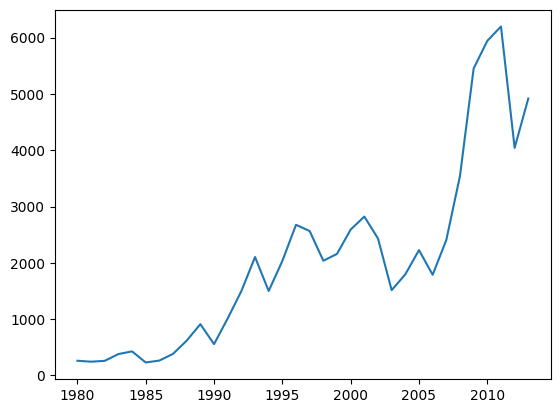

In [22]:
haiti.plot()

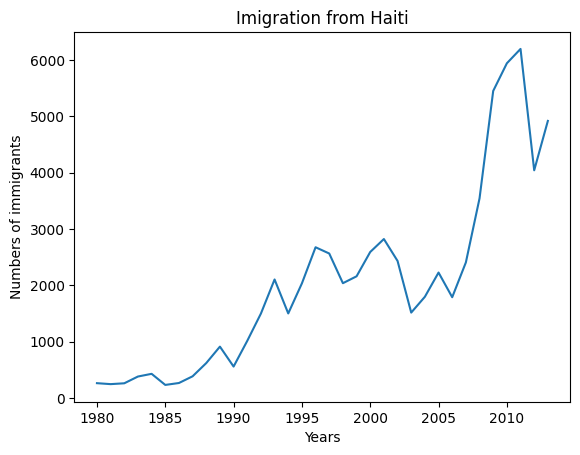

In [23]:
haiti.index = haiti.index.map(int)
haiti.plot(kind='line')

plt.title('Imigration from Haiti')
plt.xlabel('Years')
plt.ylabel('Numbers of immigrants')

plt.show()

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. 

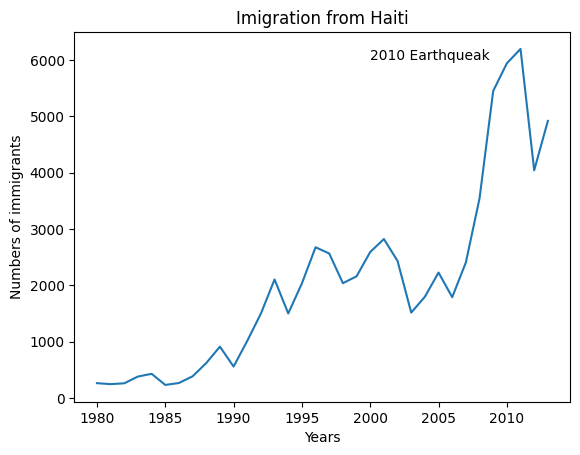

In [24]:
haiti.index = haiti.index.map(int)
haiti.plot(kind='line')

plt.text(2000 , 6000 , '2010 Earthqueak')

plt.title('Imigration from Haiti')
plt.xlabel('Years')
plt.ylabel('Numbers of immigrants')

plt.show()

Let's compare the number of immigrants from India and China from 1980 to 2013.

In [25]:
china_india = df_c.loc[['China' , 'India'] , years]
china_india = china_india.transpose()
china_india

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704
1985,1816,4211
1986,1960,7150
1987,2643,10189
1988,2758,11522
1989,4323,10343


<Axes: >

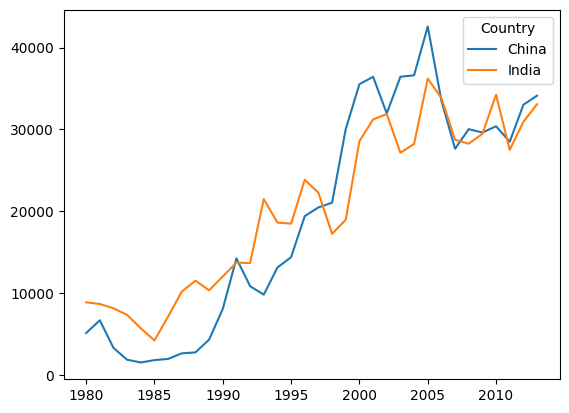

In [26]:
china_india.plot(kind = "line")

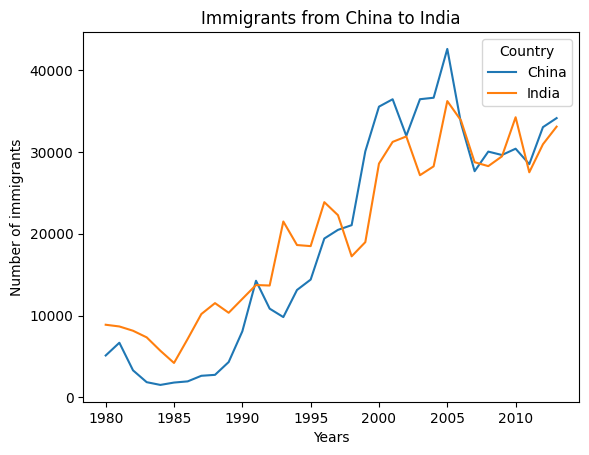

In [27]:
china_india.index = china_india.index.map(int)
china_india.plot(kind = "line")

plt.title('Immigrants from China to India')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')

plt.show()

### Area Plots

Let's visualized the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013.

In [28]:
df_c.sort_values(['Total'] , ascending=False , axis=0 , inplace=True)
df_top5 = df_c.head(5)
df_top5 = df_top5[years].transpose()
df_top5.head(5)

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


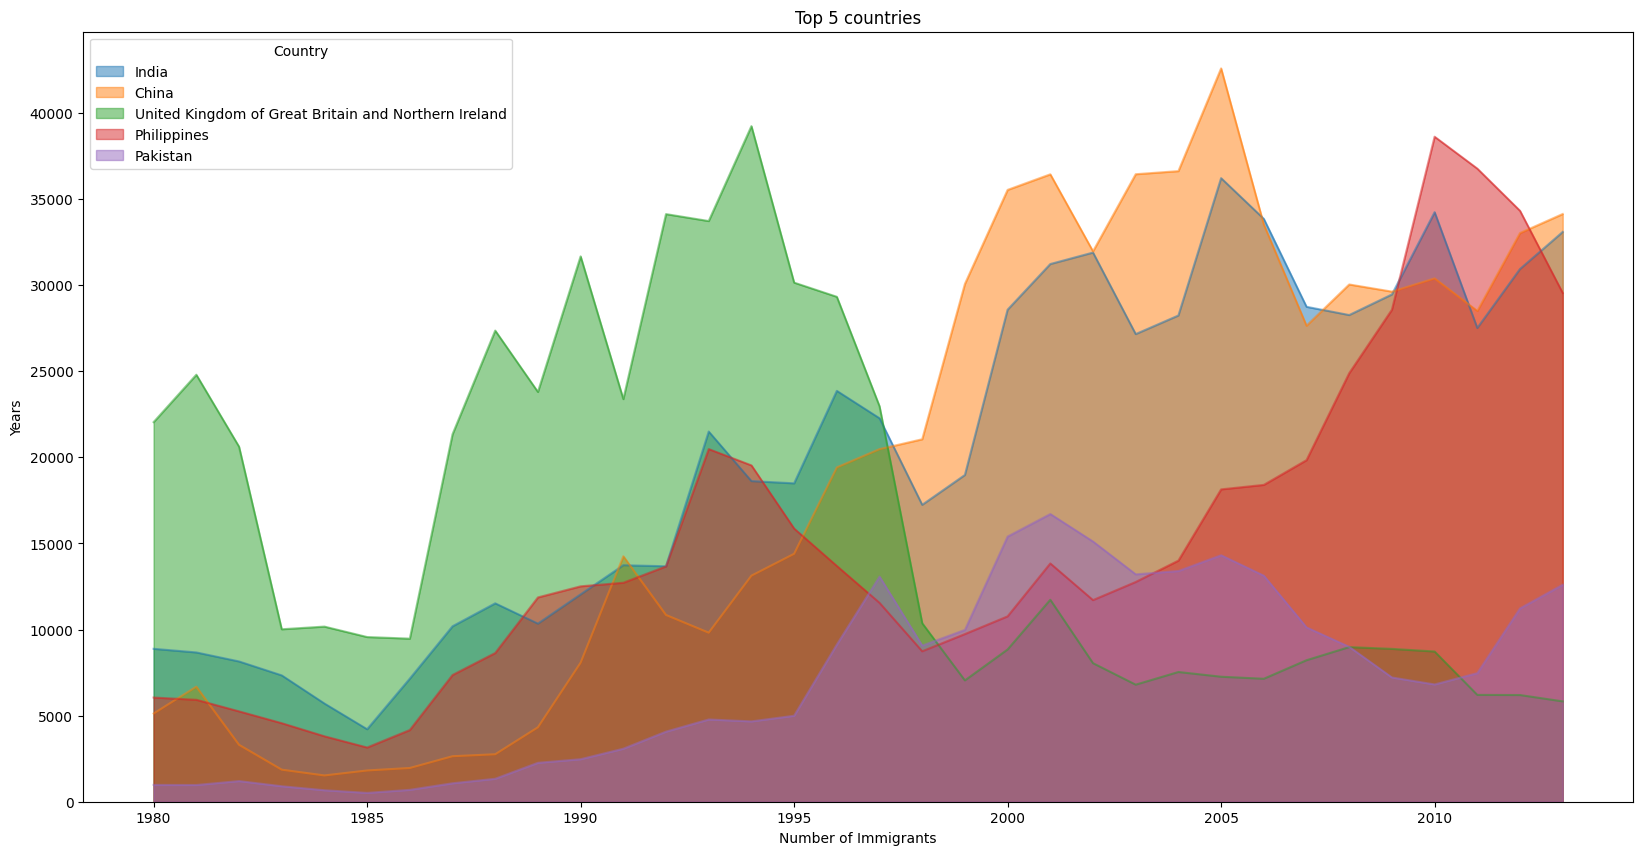

In [29]:
df_top5_index = df_top5.index.map(int)
df_top5.plot( kind = 'area' , xlabel = 'Number of Immigrants' , ylabel = 'Years' , stacked = False , figsize = (20 , 10))

plt.title('Top 5 countries')
plt.show()

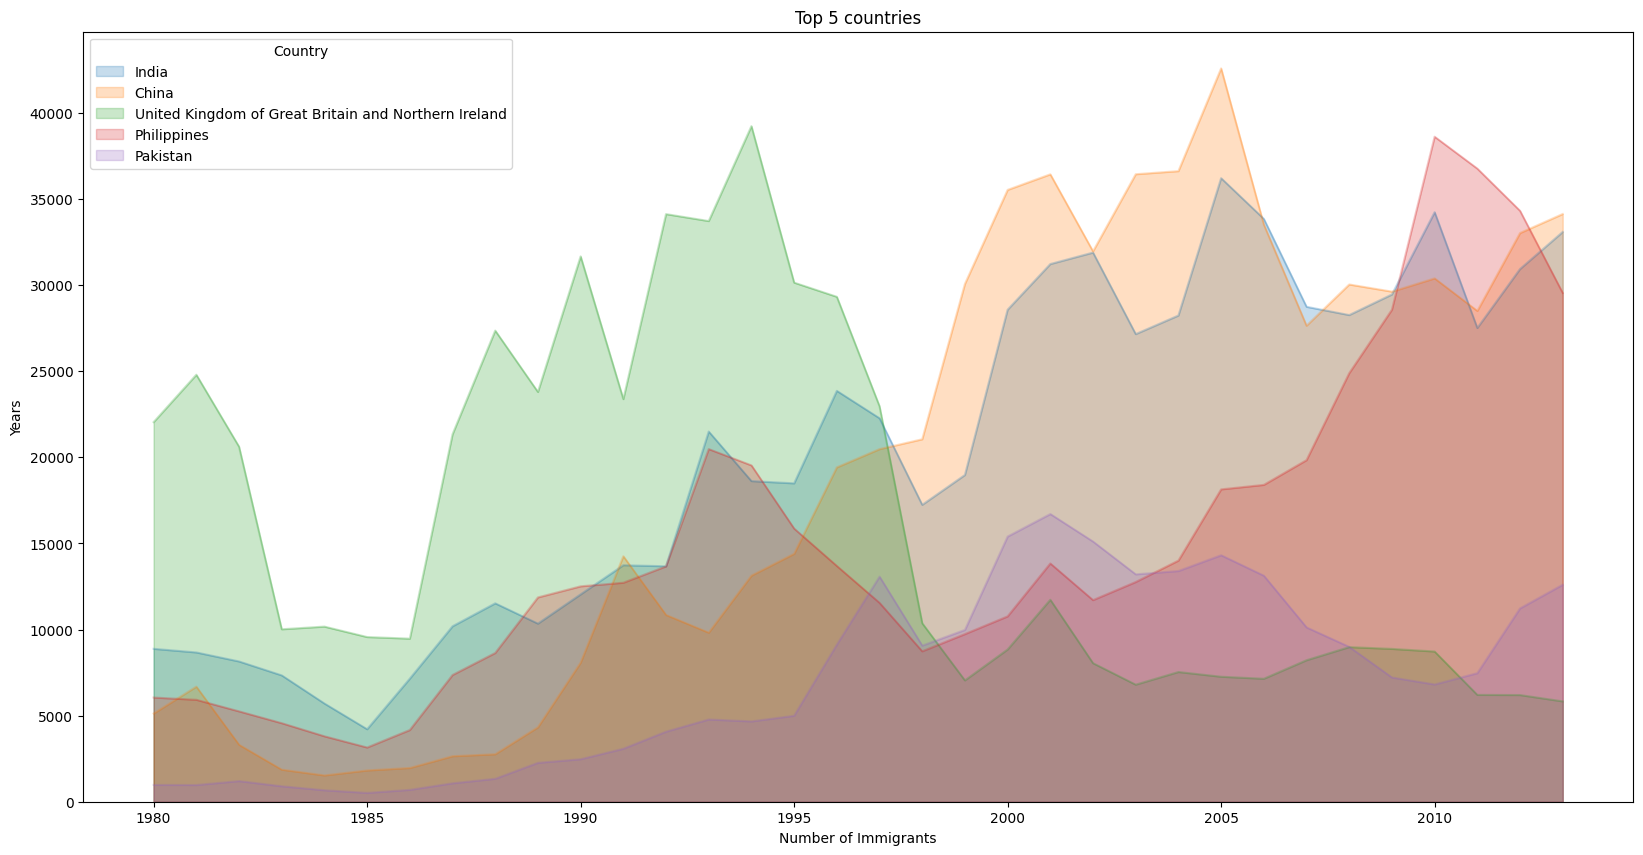

In [30]:
df_top5_index = df_top5.index.map(int)
df_top5.plot( kind = 'area' ,alpha = 0.25, xlabel = 'Number of Immigrants' , ylabel = 'Years' , stacked = False , figsize = (20 , 10))

plt.title('Top 5 countries')
plt.show()

### Histograms


Let's plot the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

In [31]:
# let's quickly view the 2013 data
df_c['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [32]:
count , bin_edges = np.histogram(df_c['2013'])
print(count , bin_edges)

[178  11   1   2   0   0   0   0   1   2] [    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


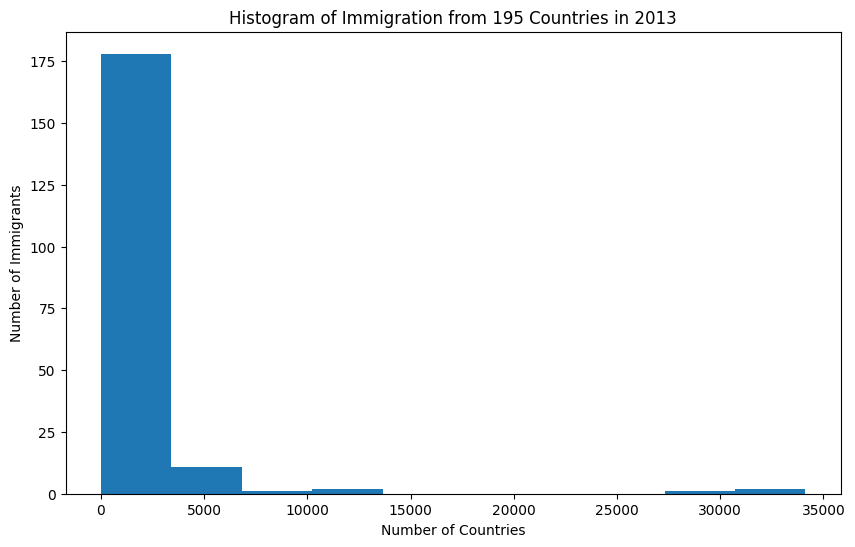

In [33]:
df_c['2013'].plot(kind = "hist", figsize = (10 , 6))

plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.xlabel('Number of Countries')
plt.ylabel('Number of Immigrants')

plt.show()

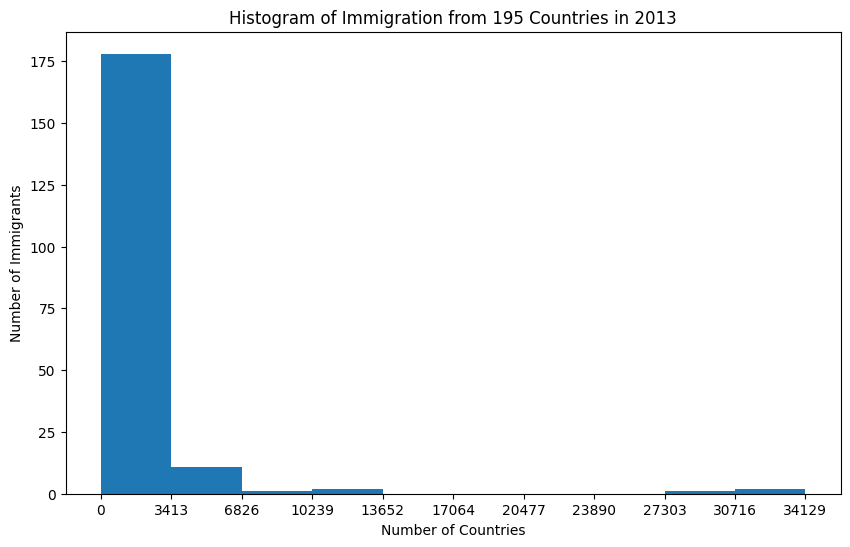

In [34]:
df_c['2013'].plot.hist(figsize = (10 , 6) , xticks=bin_edges)

plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.xlabel('Number of Countries')
plt.ylabel('Number of Immigrants')

plt.show()

Plot the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013.

In [35]:
df_dns = df_c.loc[['Denmark' , 'Norway' , 'Sweden'], years].transpose()
df_dns

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128
1985,73,54,158
1986,93,56,187
1987,109,80,198
1988,129,73,171
1989,129,76,182


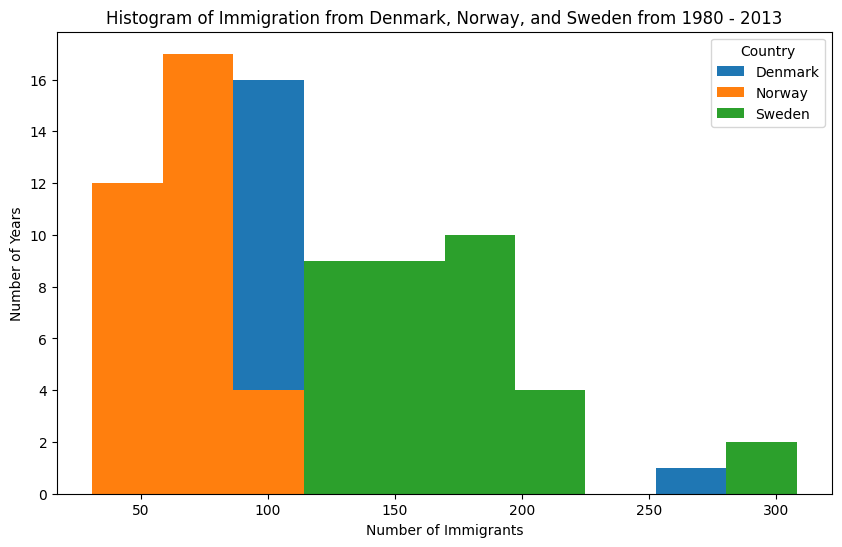

In [36]:
df_dns.plot.hist(figsize = (10 , 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Full listing of colors available in Matplotlib

In [37]:
'''
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
'''

'\nfor name, hex in matplotlib.colors.cnames.items():\n    print(name, hex)\n'

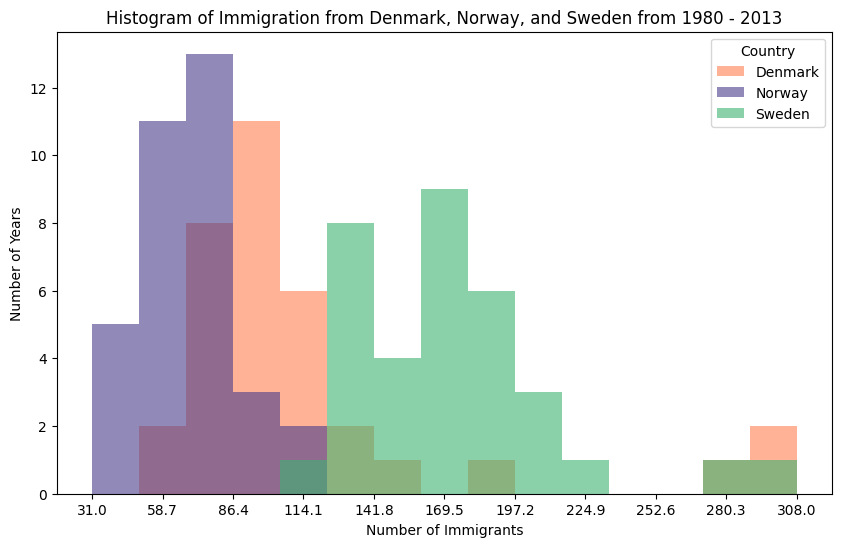

In [38]:
count , bin_edges = np.histogram(df_dns)

df_dns.plot.hist(figsize = (10 , 6),
                bins = 15,
                alpha = 0.6,
                xticks = bin_edges,
                color=['coral',  'darkslateblue' , 'mediumseagreen'])

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

### Bar Charts (Dataframe)


Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

In [39]:
# step 1: get the data
df_iceland = df_c.loc['Iceland',  years]

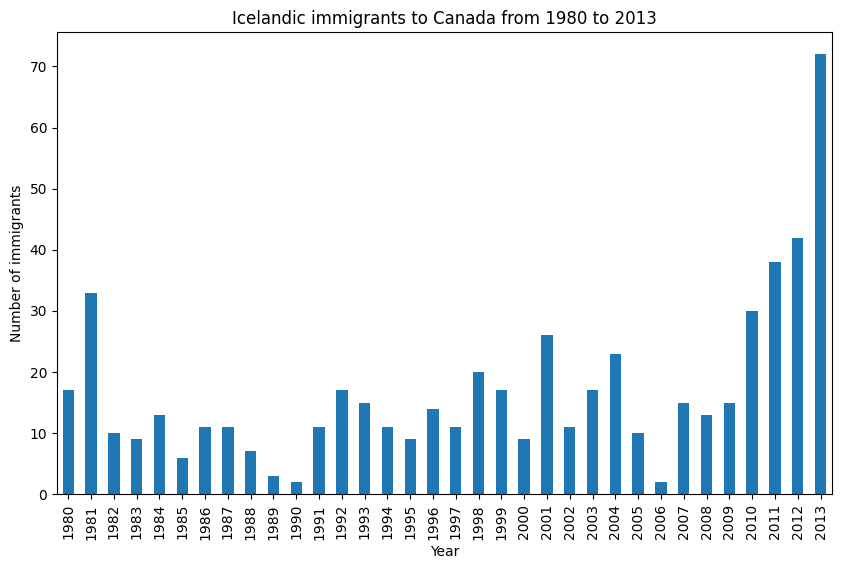

In [40]:
# step 2: plot data
df_iceland.plot.bar(figsize = (10 ,6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

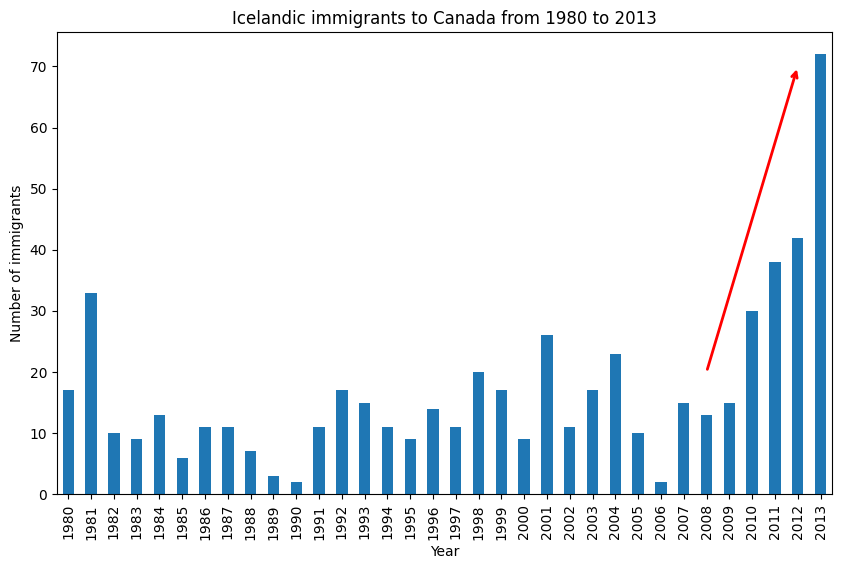

In [41]:

df_iceland.plot.bar(figsize = (10 ,6))

plt.xlabel('Year') 
plt.ylabel('Number of immigrants') 
plt.title('Icelandic immigrants to Canada from 1980 to 2013') 

# Annotate arrow
plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2)
            )
plt.show()

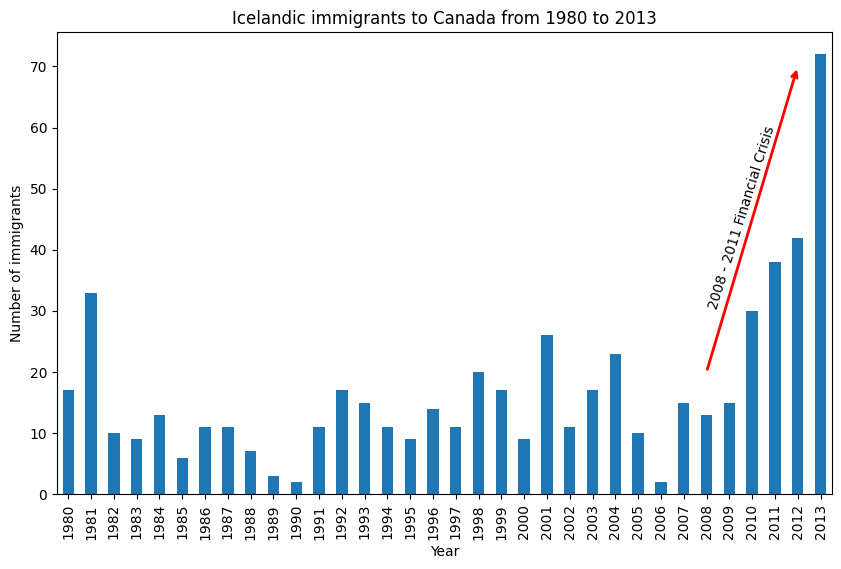

In [42]:
df_iceland.plot.bar(figsize = (10 ,6))

plt.xlabel('Year') 
plt.ylabel('Number of immigrants') 
plt.title('Icelandic immigrants to Canada from 1980 to 2013') 

# Annotate arrow
plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2)
            )
# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )


plt.show()

#### Horizontal Bar Plot



Let's plot the data pertaining to the top 15 countries.

<Axes: ylabel='Country'>

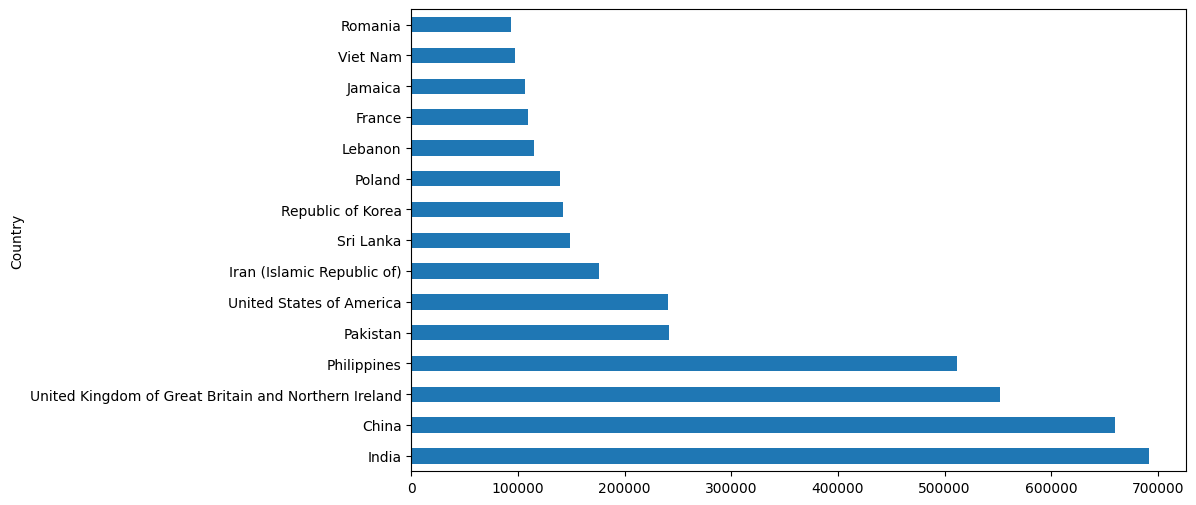

In [43]:
df_c.sort_values(['Total'],ascending = False , axis = 0 ,inplace = True)
df_top15 = df_c['Total'].head(15)

df_top15.plot.barh(figsize =(10 , 6))

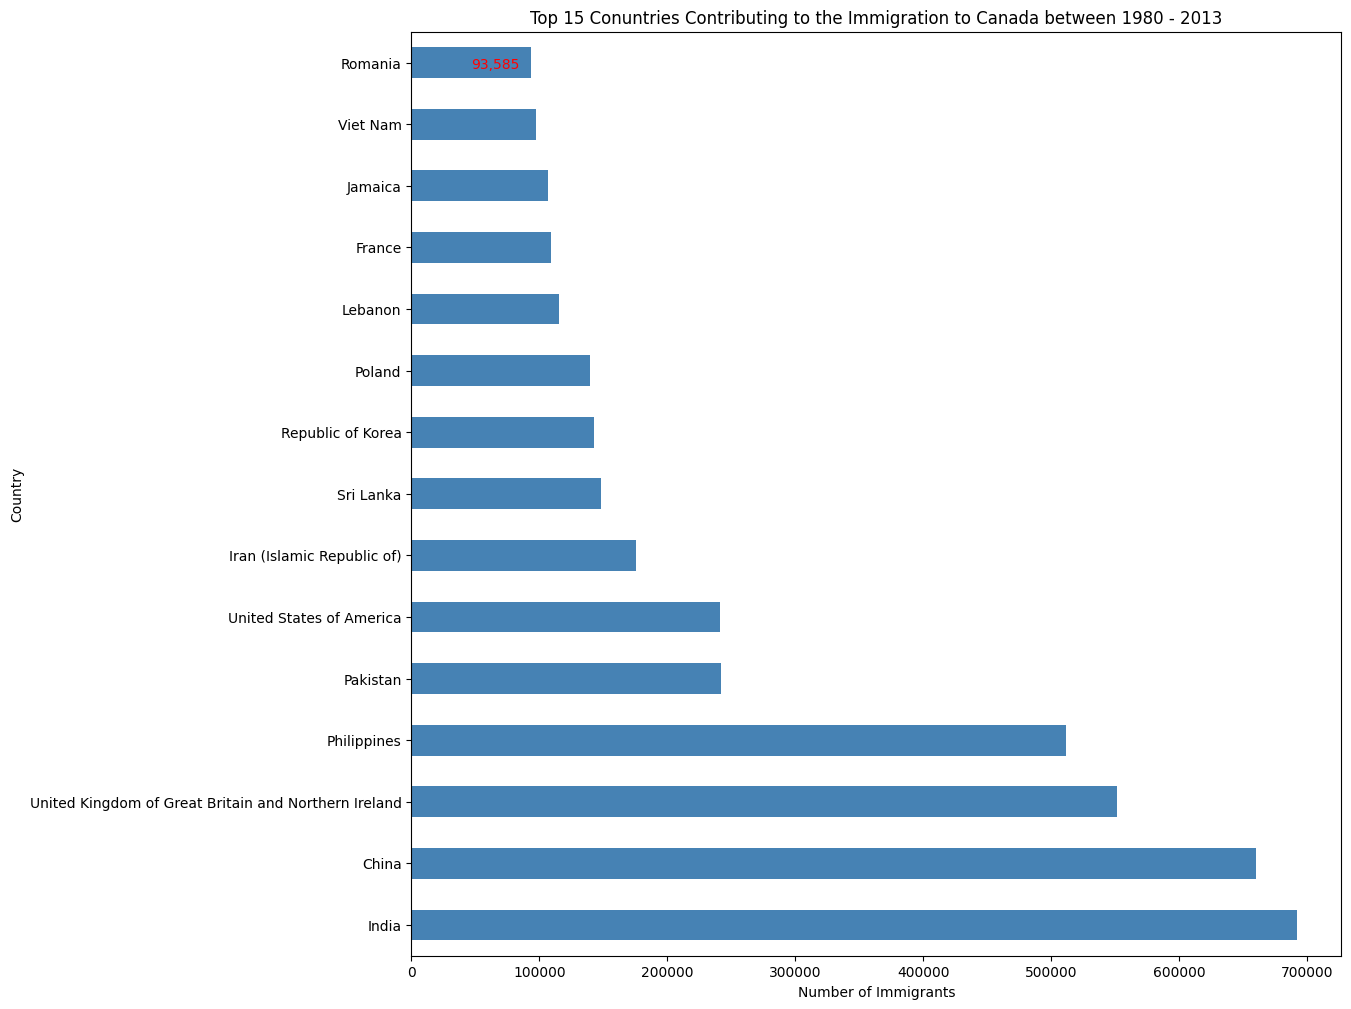

In [44]:
df_top15.plot.barh(figsize = (12 , 12) , color= 'steelblue')

plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

for index , value in enumerate(df_top15):
    label = format(int(value), ",")

plt.annotate(label , xy= (value - 47000 , index - 0.10),  color = 'red')

plt.show()

### Pie Charts


Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

In [45]:
# group countries by continents and apply sum() function 
df_continents = df_c.groupby('Continent').sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_c.groupby('Continent')))
df_continents = df_continents.drop(['Region' , 'DevName'], axis = 1)

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


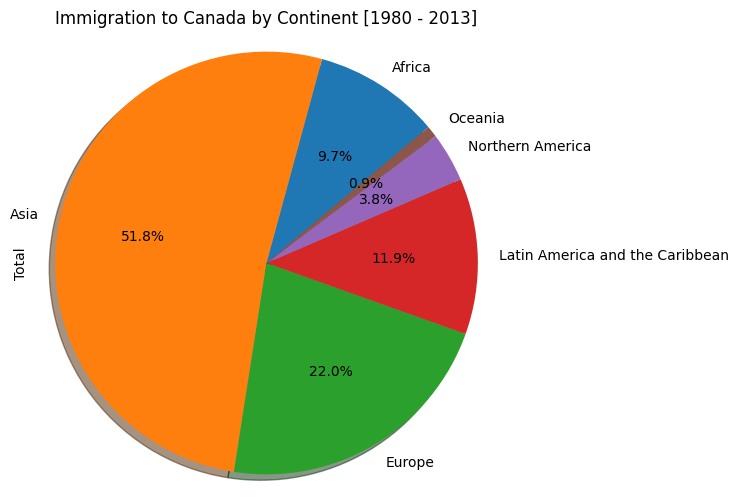

In [46]:
df_continents['Total'].plot.pie(figsize = (6,6 ),
                      autopct='%1.1f%%',       # add in percentages
                            startangle=40,     # start angle 90° (Africa)
                            shadow=True,       # add shadow
                      )
plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

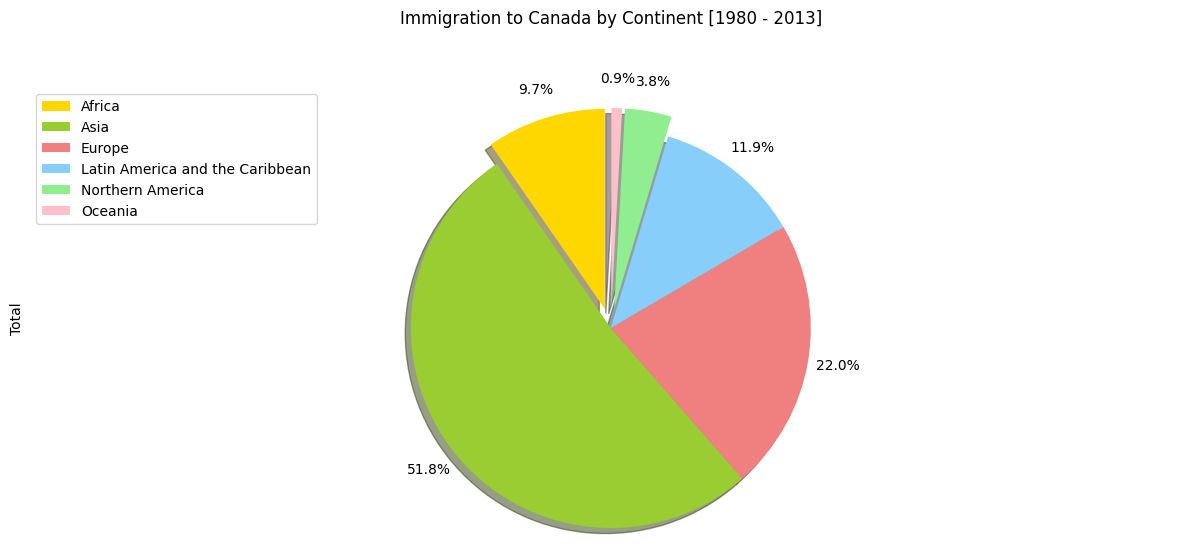

In [47]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.15,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

### Box Plots


Let's plot the box plot for the Japanese immigrants between 1980 - 2013.



<Axes: >

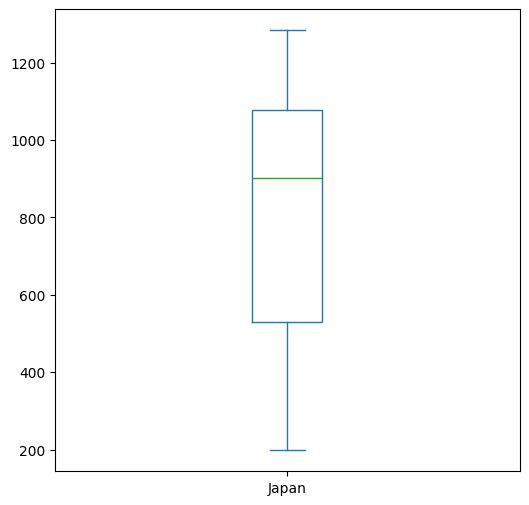

In [48]:
# Step 1: Get the dataset. 
df_japan = df_c.loc[['Japan'], years].transpose()
df_japan.plot.box(figsize = (6 ,6 ))

Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

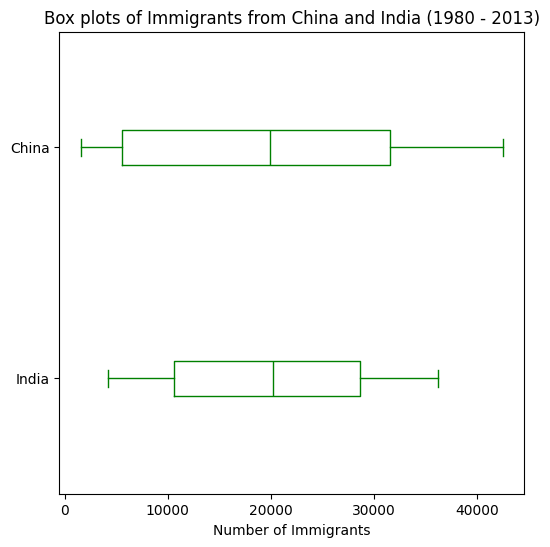

In [49]:
# Step 1: Get the dataset for China and India 
df_CI=df_c.loc[['India','China'],years].transpose()

#Step 2: Plot data.
df_CI.plot.box(figsize = ( 6 ,6 ) , vert = False , color = 'green')

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()


#### Subplots

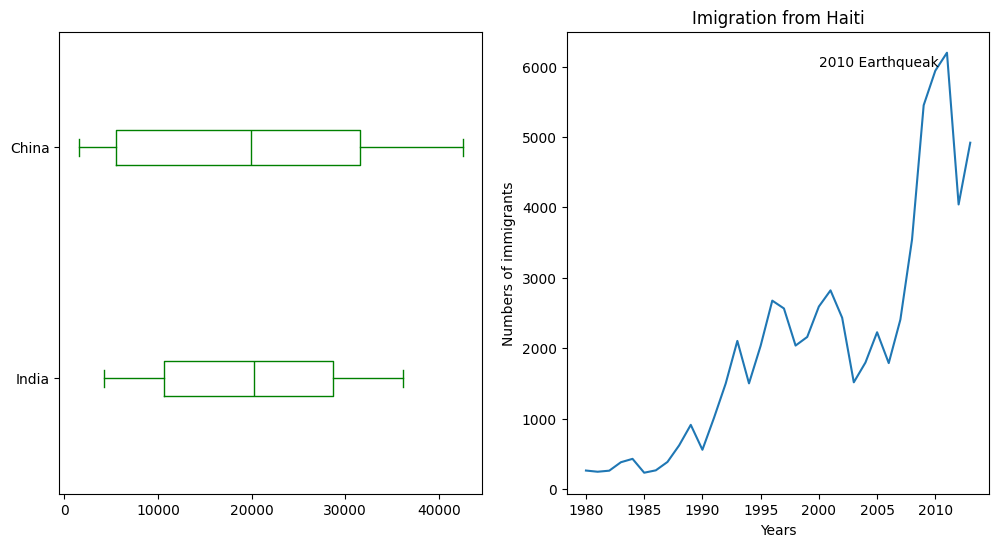

In [50]:
fig = plt.figure()

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1: Box plot
df_CI.plot.box(figsize = ( 6 ,6 ) , vert = False , color = 'green' , ax = ax0)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

# Subplot 2: Line plot

haiti.index = haiti.index.map(int)
haiti.plot(kind='line',figsize = (12 ,6) , ax = ax1)

plt.text(2000 , 6000 , '2010 Earthqueak')

plt.title('Imigration from Haiti')
plt.xlabel('Years')
plt.ylabel('Numbers of immigrants')

plt.show()

### Scatter Plots


Using a scatter plot, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.



In [52]:
# Step 1: Get the dataset.

df_tot = pd.DataFrame(df_c[years].sum())
df_tot = df_tot.reset_index()
df_tot.columns = ['year' , 'total']
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


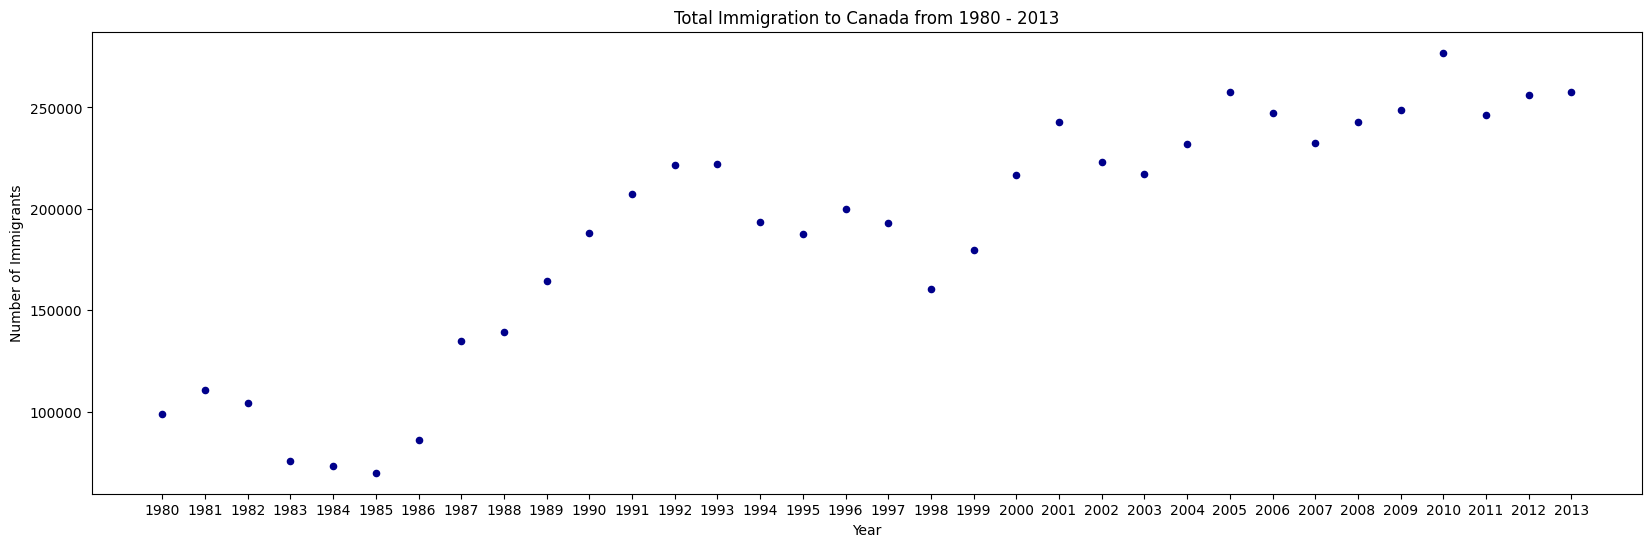

In [56]:
# Step 2: Plot the data.

df_tot.plot.scatter(x='year', y='total', figsize=(20, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

### Bubble Plots


Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the normalized value of the population for each year.

In [57]:
# Step 1: Get the data for Brazil and Argentina.

df_c_t = df_c[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_c_t.index = map(int, df_c_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_c_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_c_t.reset_index(inplace=True)

# view the changes
df_c_t.head()

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


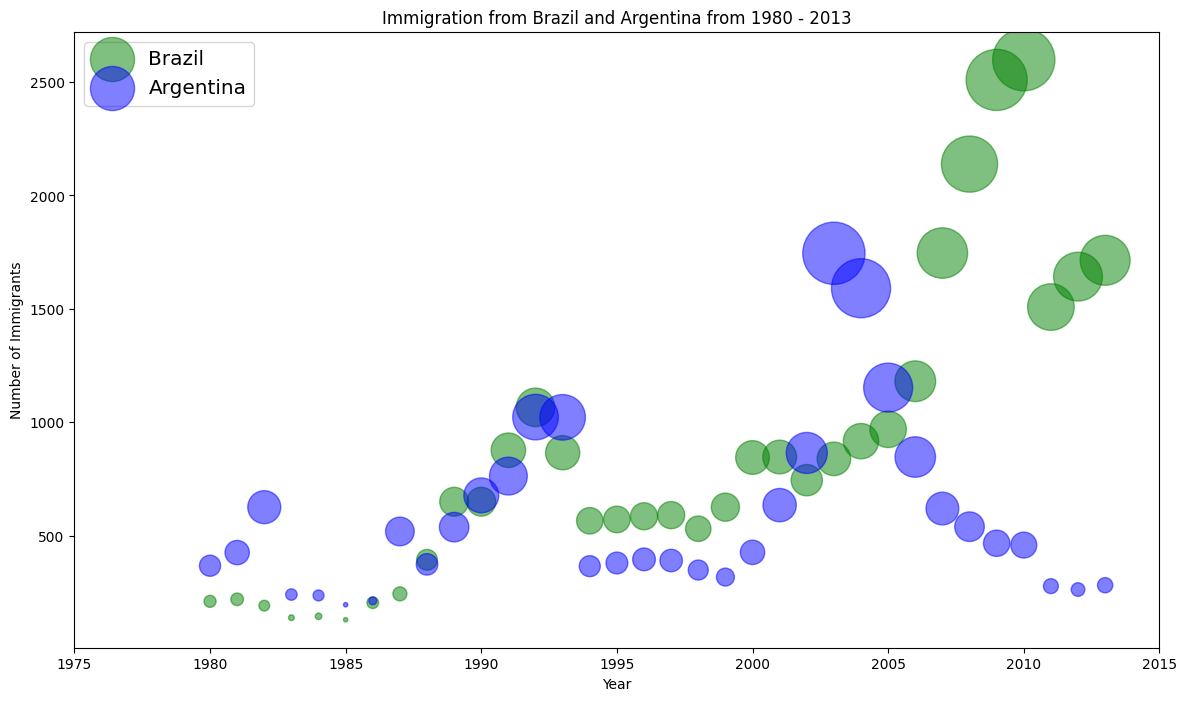

In [63]:
# Step 2: Create the normalized weights.

# normalize Brazil data
norm_brazil = (df_c_t['Brazil'] - df_c_t['Brazil'].min()) / (df_c_t['Brazil'].max() - df_c_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_c_t['Argentina'] - df_c_t['Argentina'].min()) / (df_c_t['Argentina'].max() - df_c_t['Argentina'].min())

# Brazil
ax0 = df_c_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_c_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

Let's create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013

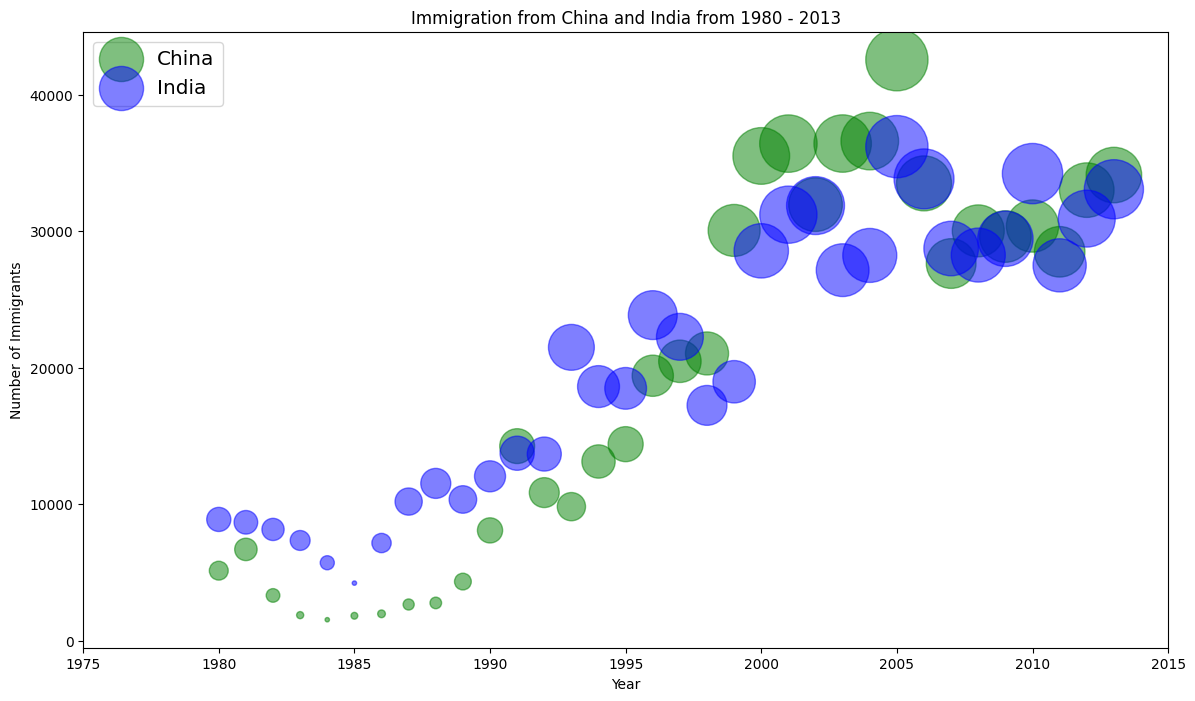

In [77]:
# Step 1: Normalize the data pertaining to China and India.

# normalize China data
norm_china = (df_c_t['China'] - df_c_t['China'].min()) / (df_c_t['China'].max() - df_c_t['China'].min())

# normalize India data
norm_india = (df_c_t['India'] - df_c_t['India'].min()) / (df_c_t['India'].max() - df_c_t['India'].min())




# Step 2: Plot the data.

# Plotting China data
ax0 = df_c_t.plot(kind='scatter',
                 x='Year',
                 y='China',
                 figsize=(14, 8),
                 alpha=0.5,                  # transparency
                 color='green',
                 s=norm_china * 2000 + 10,  # pass in weights 
                 xlim=(1975, 2015)
                )

# Plotting India data on the same plot
ax1 = df_c_t.plot(kind='scatter',
                 x='Year',
                 y='India',
                 alpha=0.5,
                 color="blue",
                 s=norm_india * 2000 + 10,
                 ax=ax0  # plot on the same axes
                )

# Set labels and title
ax0.set_ylabel('Number of Immigrants')
ax0.set_xlabel('Year')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

plt.show()  # Display the plot
